# Visualizing spread in DPE fitness data

In [1]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from collections import OrderedDict
import seaborn as sns

In [2]:
#reformatting datatype
DPE_table = pd.read_csv('20210413_final_s_table_unfiltered.csv')
convert_dict = {'Epoch': int}
DPE_data = DPE_table.astype(convert_dict)

#making a haploid only dataset
DPE_haps = DPE_data[(DPE_data['ploidy'] == 'H')&(DPE_data['evoEnvt'] != 'YP10%D')]

#making a diploid only dataset
DPE_dips = DPE_data[(DPE_data['ploidy'] == 'D')&(DPE_data['evoEnvt'] != 'YP10%D')]
DPE_dips

,Unnamed: 0,BCs-in-pop,Epoch,LP,Parsing,celltype,evoEnvt,evocode,evocode-Epoch,ploidy,...,s_RT(10-30),s_RT(30-50),stderr(s)_RT(10-30),stderr(s)_RT(30-50),Epoch-true,s_30_adj,s_AA_adj,s_37_adj,s_RT_adj,s_NaCl_adj
155,155,NaN,0,1.0,LP1_parsing,Diploid,YPD+AA,p4-G5,p4-G5-0,D,...,-0.012921,-0.006343,0.002624,0.004229,0.0,0.016014,-0.009256,0.022268,-0.009632,0.067708
156,156,NaN,0,1.0,LP1_parsing,Diploid,YPD,p4-C8,p4-C8-0,D,...,-0.006396,0.002770,0.000286,0.007092,0.0,0.009166,0.007211,0.017098,-0.001813,0.039715
157,157,NaN,0,1.0,LP1_parsing,Diploid,YPD(37C),p7-A8,p7-A8-0,D,...,-0.017583,-0.006179,0.002772,0.009670,0.0,0.021668,-0.002782,0.020267,-0.011881,0.073734
158,158,NaN,0,1.0,LP1_parsing,Diploid,YPD+AA,p1-G8,p1-G8-0,D,...,0.000661,-0.004649,0.000944,0.000310,0.0,0.000360,-0.001767,0.002807,-0.001994,-0.000519
159,159,NaN,0,1.0,LP1_parsing,Diploid,YPD,p1-G7,p1-G7-0,D,...,0.001122,0.003835,0.000904,0.005991,0.0,-0.004382,0.002798,-0.001136,0.002479,0.002308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1112,NaN,1000,2.0,LP2_parsing,Diploid,YPD+AA,p5-D5,p5-D5-1000,D,...,-0.060878,-0.099015,0.000220,0.008411,1000.0,0.076853,0.230671,-0.048749,-0.079946,0.137708
1113,1113,NaN,1000,2.0,LP2_parsing,Diploid,YPD(37C),p7-H7,p7-H7-1000,D,...,-0.015766,0.001949,0.009132,0.008806,1000.0,0.022191,0.010723,0.024856,-0.006909,0.055395
1114,1114,NaN,1000,2.0,LP2_parsing,Diploid,YPD+AA,p1-D8,p1-D8-1000,D,...,-0.053627,-0.161040,0.013225,0.022665,1000.0,0.024485,0.195200,-0.080538,-0.107334,0.062170
1115,1115,NaN,1000,2.0,LP2_parsing,Diploid,YPD+AA,p3-C6,p3-C6-1000,D,...,-0.015298,-0.014624,0.006762,0.001953,1000.0,0.035362,0.191944,-0.031836,-0.014961,0.066045


## making boxplots

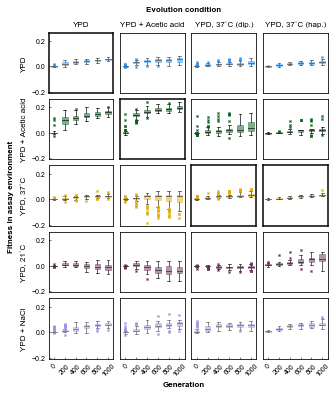

In [3]:
import seaborn as sns
import matplotlib
colors=['#2497FD','#025F17','#E1AB06','#6B2E58','#A48DE2']
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
#Plotting
YPD = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD')]
YPD37 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD(37C)')]
YPDAA = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD+AA')]
YPD37H = DPE_haps[(DPE_haps['evoEnvt'] == 'YPD(37C)')]
#######
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5, 4, figsize=(5,6), sharey=True)
my_suptitle = plt.suptitle("Evolution condition",y=0.94,fontsize=8, fontweight="bold")
sns.boxplot(x="Epoch", y="s_30_adj", data=YPD, ax=ax1, linewidth=0.75, fliersize=1, width=0.5, color=colors[0], boxprops = dict(alpha=0.5, color=colors[0]), flierprops = dict(marker='x', markeredgecolor=colors[0], markerfacecolor=colors[0], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_30_adj", data=YPDAA, ax=ax2, linewidth=0.75, fliersize=1, width=0.5, color=colors[0], boxprops = dict(alpha=0.5, color=colors[0]), flierprops = dict(marker='x', markeredgecolor=colors[0], markerfacecolor=colors[0], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_30_adj", data=YPD37, ax=ax3, linewidth=0.75, fliersize=1, width=0.5, color=colors[0], boxprops = dict(alpha=0.5, color=colors[0]), flierprops = dict(marker='x', markeredgecolor=colors[0], markerfacecolor=colors[0], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_30_adj", data=YPD37H, ax=ax4, linewidth=0.75, fliersize=1, width=0.5, color=colors[0], boxprops = dict(alpha=0.5, color=colors[0]), flierprops = dict(marker='x', markeredgecolor=colors[0], markerfacecolor=colors[0], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_AA_adj", data=YPD, ax=ax5, linewidth=0.75, fliersize=1, width=0.5, color=colors[1], boxprops = dict(alpha=0.5, color=colors[1]), flierprops = dict(marker='x', markeredgecolor=colors[1], markerfacecolor=colors[1], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_AA_adj", data=YPDAA, ax=ax6, linewidth=0.75, fliersize=1, width=0.5, color=colors[1], boxprops = dict(alpha=0.5, color=colors[1]), flierprops = dict(marker='x', markeredgecolor=colors[1], markerfacecolor=colors[1], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_AA_adj", data=YPD37, ax=ax7, linewidth=0.75, fliersize=1, width=0.5, color=colors[1], boxprops = dict(alpha=0.5, color=colors[1]), flierprops = dict(marker='x', markeredgecolor=colors[1], markerfacecolor=colors[1], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_AA_adj", data=YPD37H, ax=ax8, linewidth=0.75, fliersize=1, width=0.5, color=colors[1], boxprops = dict(alpha=0.5, color=colors[1]), flierprops = dict(marker='x', markeredgecolor=colors[1], markerfacecolor=colors[1], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_37_adj", data=YPD, ax=ax9, linewidth=0.75, fliersize=1, width=0.5, color=colors[2], boxprops = dict(alpha=0.5, color=colors[2]), flierprops = dict(marker='x', markeredgecolor=colors[2], markerfacecolor=colors[2], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_37_adj", data=YPDAA, ax=ax10, linewidth=0.75, fliersize=1, width=0.5, color=colors[2], boxprops = dict(alpha=0.5, color=colors[2]), flierprops = dict(marker='x', markeredgecolor=colors[2], markerfacecolor=colors[2], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_37_adj", data=YPD37, ax=ax11, linewidth=0.75, fliersize=1, width=0.5, color=colors[2], boxprops = dict(alpha=0.5, color=colors[2]), flierprops = dict(marker='x', markeredgecolor=colors[2], markerfacecolor=colors[2], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_37_adj", data=YPD37H, ax=ax12, linewidth=0.75, fliersize=1, width=0.5, color=colors[2], boxprops = dict(alpha=0.5, color=colors[2]), flierprops = dict(marker='x', markeredgecolor=colors[2], markerfacecolor=colors[2], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_RT_adj", data=YPD, ax=ax13, linewidth=0.75, fliersize=1, width=0.5, color=colors[3], boxprops = dict(alpha=0.5, color=colors[3]), flierprops = dict(marker='x', markeredgecolor=colors[3], markerfacecolor=colors[3], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_RT_adj", data=YPDAA, ax=ax14, linewidth=0.75, fliersize=1, width=0.5, color=colors[3], boxprops = dict(alpha=0.5, color=colors[3]), flierprops = dict(marker='x', markeredgecolor=colors[3], markerfacecolor=colors[3], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_RT_adj", data=YPD37, ax=ax15, linewidth=0.75, fliersize=1, width=0.5, color=colors[3], boxprops = dict(alpha=0.5, color=colors[3]), flierprops = dict(marker='x', markeredgecolor=colors[3], markerfacecolor=colors[3], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_RT_adj", data=YPD37H, ax=ax16, linewidth=0.75, fliersize=1, width=0.5, color=colors[3], boxprops = dict(alpha=0.5, color=colors[3]), flierprops = dict(marker='x', markeredgecolor=colors[3], markerfacecolor=colors[3], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_NaCl_adj", data=YPD, ax=ax17, linewidth=0.75, fliersize=1, width=0.5, color=colors[4], boxprops = dict(alpha=0.5, color=colors[4]), flierprops = dict(marker='x', markeredgecolor=colors[4], markerfacecolor=colors[4], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_NaCl_adj", data=YPDAA, ax=ax18, linewidth=0.75, fliersize=1, width=0.5, color=colors[4], boxprops = dict(alpha=0.5, color=colors[4]), flierprops = dict(marker='x', markeredgecolor=colors[4], markerfacecolor=colors[4], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_NaCl_adj", data=YPD37, ax=ax19, linewidth=0.75, fliersize=1, width=0.5, color=colors[4], boxprops = dict(alpha=0.5, color=colors[4]), flierprops = dict(marker='x', markeredgecolor=colors[4], markerfacecolor=colors[4], markersize=2,
                  linestyle='none'))
sns.boxplot(x="Epoch", y="s_NaCl_adj", data=YPD37H, ax=ax20, linewidth=0.75, fliersize=1, width=0.5, color=colors[4], boxprops = dict(alpha=0.5, color=colors[4]), flierprops = dict(marker='x', markeredgecolor=colors[4], markerfacecolor=colors[4], markersize=2,
                  linestyle='none'))
ax1.set_title('YPD', fontsize=8)
ax1.set_ylabel("YPD", fontsize=8)
#ax1.set_xlabel("Generation", fontsize=8)
ax1.axes.xaxis.set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax1.get_xticklabels(), fontsize=7)
plt.setp(ax1.get_yticklabels(), fontsize=7)
ax2.set_title('YPD + Acetic acid', fontsize=8)
ax2.set_ylabel("", fontsize=0)
ax2.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.tick_params(direction='in', length=2, width=0.5)
#ax2.set_xlabel("Epoch", fontsize=8)
plt.setp(ax2.get_xticklabels(), fontsize=7)
ax3.set_title('YPD, 37˚C (dip.)', fontsize=8)
ax3.set_ylabel("", fontsize=0)
#ax3.set_xlabel("Epoch", fontsize=8)
ax3.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax3.get_xticklabels(), fontsize=7)
ax4.set_title('YPD, 37˚C (hap.)', fontsize=8)
ax4.set_ylabel("", fontsize=0)
#ax4.set_xlabel("Epoch", fontsize=8)
ax4.axes.yaxis.set_visible(False)
ax4.axes.xaxis.set_visible(False)
ax4.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax4.get_xticklabels(), fontsize=7)
##
ax5.set_ylabel("YPD + Acetic acid", fontsize=8)
ax5.axes.xaxis.set_visible(False)
ax5.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax5.get_xticklabels(), fontsize=7)
plt.setp(ax5.get_yticklabels(), fontsize=7)
ax6.set_ylabel("", fontsize=0)
ax6.axes.yaxis.set_visible(False)
ax6.axes.xaxis.set_visible(False)
ax6.spines['left'].set_linewidth(1.5)
ax6.spines['right'].set_linewidth(1.5)
ax6.spines['top'].set_linewidth(1.5)
ax6.spines['bottom'].set_linewidth(1.5)
ax6.tick_params(direction='in', length=2, width=0.5)
#ax2.set_xlabel("Epoch", fontsize=8)
plt.setp(ax6.get_xticklabels(), fontsize=7)
ax7.set_ylabel("", fontsize=0)
#ax3.set_xlabel("Epoch", fontsize=8)
ax7.axes.yaxis.set_visible(False)
ax7.axes.xaxis.set_visible(False)
ax7.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax7.get_xticklabels(), fontsize=7)
ax8.set_ylabel("", fontsize=0)
#ax4.set_xlabel("Epoch", fontsize=8)
ax8.axes.yaxis.set_visible(False)
ax8.axes.xaxis.set_visible(False)
ax8.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax8.get_xticklabels(), fontsize=7)
##
##
ax9.set_ylabel("YPD, 37˚C", fontsize=8)
ax9.axes.xaxis.set_visible(False)
ax9.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax9.get_xticklabels(), fontsize=7)
plt.setp(ax9.get_yticklabels(), fontsize=7)
ax10.set_ylabel("", fontsize=0)
ax10.axes.yaxis.set_visible(False)
ax10.axes.xaxis.set_visible(False)
ax10.tick_params(direction='in', length=2, width=0.5)
#ax2.set_xlabel("Epoch", fontsize=8)
plt.setp(ax10.get_xticklabels(), fontsize=7)
ax11.set_ylabel("", fontsize=0)
#ax3.set_xlabel("Epoch", fontsize=8)
ax11.axes.yaxis.set_visible(False)
ax11.axes.xaxis.set_visible(False)
ax11.spines['left'].set_linewidth(1.5)
ax11.spines['right'].set_linewidth(1.5)
ax11.spines['top'].set_linewidth(1.5)
ax11.spines['bottom'].set_linewidth(1.5)
ax12.spines['left'].set_linewidth(1.5)
ax12.spines['right'].set_linewidth(1.5)
ax12.spines['top'].set_linewidth(1.5)
ax12.spines['bottom'].set_linewidth(1.5)
ax11.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax11.get_xticklabels(), fontsize=7)
ax12.set_ylabel("", fontsize=0)
#ax4.set_xlabel("Epoch", fontsize=8)
ax12.axes.yaxis.set_visible(False)
ax12.axes.xaxis.set_visible(False)
ax12.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax12.get_xticklabels(), fontsize=7)
##
##
ax13.set_ylabel("YPD, 21˚C", fontsize=8)
ax13.axes.xaxis.set_visible(False)
ax13.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax13.get_xticklabels(), fontsize=7)
plt.setp(ax13.get_yticklabels(), fontsize=7)
ax14.set_ylabel("", fontsize=0)
ax14.axes.yaxis.set_visible(False)
ax14.axes.xaxis.set_visible(False)
ax14.tick_params(direction='in', length=2, width=0.5)
#ax2.set_xlabel("Epoch", fontsize=8)
plt.setp(ax14.get_xticklabels(), fontsize=7)
ax15.set_ylabel("", fontsize=0)
#ax3.set_xlabel("Epoch", fontsize=8)
ax15.axes.yaxis.set_visible(False)
ax15.axes.xaxis.set_visible(False)
ax15.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax15.get_xticklabels(), fontsize=7)
ax16.set_ylabel("", fontsize=0)
ax17.set_xlabel("", fontsize=0)
ax16.axes.yaxis.set_visible(False)
#ax16.axes.xaxis.set_visible(False)
ax16.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax16.get_xticklabels(), fontsize=7)
##
ax17.set_ylabel("YPD + NaCl", fontsize=8)
#ax17.axes.xaxis.set_visible(False)
ax17.tick_params(direction='in', length=2, width=0.5)

plt.setp(ax17.get_xticklabels(), fontsize=7, rotation=45)
plt.setp(ax17.get_yticklabels(), fontsize=7)
ax18.set_ylabel("", fontsize=0)
ax18.axes.yaxis.set_visible(False)
#ax18.axes.xaxis.set_visible(False)
ax18.tick_params(direction='in', length=2, width=0.5)
ax18.set_xlabel("", fontsize=0)
plt.setp(ax18.get_xticklabels(), fontsize=7, rotation=45)
ax19.set_ylabel("", fontsize=0)
ax19.set_xlabel("", fontsize=0)
ax19.axes.yaxis.set_visible(False)
#ax19.axes.xaxis.set_visible(False)
ax19.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax19.get_xticklabels(), fontsize=7, rotation=45)
ax20.set_ylabel("", fontsize=0)
ax20.set_xlabel("", fontsize=0)
ax20.axes.yaxis.set_visible(False)
ax16.axes.xaxis.set_visible(False)
#ax20.axes.xaxis.set_visible(False)
ax20.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax20.get_xticklabels(), fontsize=7, rotation=45)
##
plt.subplots_adjust(wspace=0.1,hspace=0.1)
fig.text(0.5, 0.06, 'Generation', ha='center',fontsize=8, fontweight="bold")
fig.text(0.01, 0.5, 'Fitness in assay environment', va='center', rotation='vertical', fontsize=8, fontweight="bold")
plt.subplots_adjust(wspace=0.1,hspace=0.1)
plt.savefig('20210622_box_unfil_adj.png', bbox_inches='tight', dpi=1200)

## IQR point estimate calculation

In [4]:
#use the real data to calculate the point estimate for IQR

#37haps
MQ1_ypd37h = DPE_haps[(DPE_haps['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
MQ3_ypd37h = DPE_haps[(DPE_haps['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
MIQR_ypd37h = MQ3_ypd37h - MQ1_ypd37h

#37dips
MQ1_ypd37 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
MQ3_ypd37 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
MIQR_ypd37 = MQ3_ypd37 - MQ1_ypd37

#30dips
MQ1_ypd30 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
MQ3_ypd30 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
MIQR_ypd30 = MQ3_ypd30 - MQ1_ypd30

#AAdips
MQ1_ypdaa = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD+AA')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
MQ3_ypdaa = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD+AA')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
MIQR_ypdAA = MQ3_ypdaa - MQ1_ypdaa

## calculate 95% confidence intervals from bootstrapped IQR

In [5]:
cd bootstrap

/Users/angelaphillips/Repositories/pleiotropy-dynamics/figure5/bootstrap


In [6]:
#need to take in bootstrapped data and calculate mean IQR and 95% CI
#running through files
import os
#make a list for each evolution condition
bs_IQR_ypd37h=[]
bs_IQR_ypd37=[]
bs_IQR_ypd30=[]
bs_IQR_ypdAA=[]
count = 0
directory = 'unfiltered_bootstrap_adj'
#for each bootstrapped s table, separate into haploids and diploids, then calculate IQR per evolution environment/epoch for each assay envt
#then append each of these IQR dataframes to the above list, according to evolution envt
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file = directory+filename
        count = count + 1
        #print(os.path.join(file))
        print(filename)
        print(directory+filename)
        
        #reformatting datatype
        DPE_table = pd.read_csv('unfiltered_bootstrap_adj/'+filename)
        convert_dict = {'Epoch': int}
        DPE_data = DPE_table.astype(convert_dict)

        #making a haploid only dataset
        DPE_haps = DPE_data[(DPE_data['ploidy'] == 'H')&(DPE_data['evoEnvt'] != 'YP10%D')]

        #making a diploid only dataset
        DPE_dips = DPE_data[(DPE_data['ploidy'] == 'D')&(DPE_data['evoEnvt'] != 'YP10%D')]
        DPE_dips.head()

        #grouped by evolution environment
        #reformat into new dataframe for plotting

        #37haps
        Q1_ypd37h = DPE_haps[(DPE_haps['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
        Q3_ypd37h = DPE_haps[(DPE_haps['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
        IQR_ypd37h = Q3_ypd37h - Q1_ypd37h
        #print(IQR_ypd37h)
        bs_IQR_ypd37h.append(IQR_ypd37h)

        #37dips
        Q1_ypd37 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
        Q3_ypd37 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD(37C)')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
        IQR_ypd37 = Q3_ypd37 - Q1_ypd37
        bs_IQR_ypd37.append(IQR_ypd37)
        #print(IQR_ypd37)

        #30dips
        Q1_ypd30 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
        Q3_ypd30 = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
        IQR_ypd30 = Q3_ypd30 - Q1_ypd30
        bs_IQR_ypd30.append(IQR_ypd30)
        #print(IQR_ypd30)

        #AAdips
        Q1_ypdaa = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD+AA')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.25)
        Q3_ypdaa = DPE_dips[(DPE_dips['evoEnvt'] == 'YPD+AA')].groupby(['evoEnvt','Epoch'])['s_30_adj', 's_37_adj','s_AA_adj','s_NaCl_adj','s_RT_adj'].quantile(0.75)
        IQR_ypdAA = Q3_ypdaa - Q1_ypdaa
        bs_IQR_ypdAA.append(IQR_ypdAA)
        print(IQR_ypdAA)
        continue
    else:
        continue
print(count)

20200509_final_s_table_unfiltered_13_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_13_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004895  0.006518  0.012704    0.006904  0.004252
        200    0.010259  0.010614  0.022631    0.020543  0.028067
        400    0.019092  0.030000  0.024748    0.028979  0.046902
        600    0.024587  0.038713  0.028756    0.032591  0.050694
        800    0.024671  0.041871  0.023204    0.026730  0.046111
        1000   0.031929  0.051085  0.022156    0.028092  0.051660
20200509_final_s_table_unfiltered_12_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_12_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.005150  0.005899  0.009937    0.007299  0.003967
        200    0.011237  0.010666  0.02267

               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004102  0.004904  0.008185    0.006267  0.005234
        200    0.009770  0.010795  0.020645    0.019546  0.024133
        400    0.019891  0.037759  0.025109    0.029684  0.035118
        600    0.023320  0.033259  0.025090    0.028575  0.047961
        800    0.023913  0.047991  0.023270    0.030262  0.055408
        1000   0.028553  0.063154  0.021172    0.030029  0.044564
20200509_final_s_table_unfiltered_73_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_73_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004566  0.006997  0.008852    0.008393  0.004963
        200    0.013512  0.009820  0.025028    0.018763  0.032481
        400    0.017575  0.034136  0.023381    0.028131  0.038663
        600    0.024206  0

               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004423  0.005491  0.009257    0.007360  0.005086
        200    0.011578  0.010738  0.025158    0.019769  0.029633
        400    0.019291  0.030813  0.024027    0.027533  0.042465
        600    0.023417  0.043759  0.026591    0.030759  0.054113
        800    0.027360  0.043429  0.019509    0.026605  0.057163
        1000   0.028467  0.053152  0.025169    0.026277  0.061893
20200509_final_s_table_unfiltered_41_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_41_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.005350  0.005805  0.009937    0.006356  0.005348
        200    0.010370  0.010015  0.019694    0.020677  0.027505
        400    0.015202  0.028106  0.020855    0.026710  0.039959
        600    0.025216  0

               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.005211  0.006328  0.007525    0.009866  0.005060
        200    0.010832  0.010036  0.020301    0.016913  0.020041
        400    0.018193  0.033129  0.023168    0.029122  0.039855
        600    0.022492  0.034519  0.027718    0.030649  0.065105
        800    0.024031  0.042370  0.023062    0.024481  0.060654
        1000   0.030899  0.060500  0.022399    0.034446  0.057358
20200509_final_s_table_unfiltered_44_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_44_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004225  0.006223  0.013195    0.008774  0.004629
        200    0.009647  0.013578  0.018788    0.018052  0.025988
        400    0.017089  0.028976  0.025492    0.029926  0.040320
        600    0.021818  0

               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004195  0.004547  0.010382    0.008981  0.003466
        200    0.012368  0.008911  0.022717    0.018368  0.029256
        400    0.019588  0.030143  0.024245    0.031085  0.042317
        600    0.025246  0.035174  0.029295    0.032663  0.054527
        800    0.024302  0.045475  0.023147    0.027172  0.065368
        1000   0.031791  0.070133  0.025185    0.030407  0.054189
20200509_final_s_table_unfiltered_25_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_25_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.006344  0.007112  0.010577    0.008033  0.004570
        200    0.009297  0.010333  0.021920    0.016746  0.025396
        400    0.018088  0.031099  0.021804    0.025581  0.036300
        600    0.023873  0

               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.004655  0.006131  0.010844    0.009476  0.005498
        200    0.009012  0.010537  0.024376    0.019420  0.023344
        400    0.015806  0.027820  0.025824    0.028861  0.047410
        600    0.025628  0.031032  0.024327    0.033083  0.059821
        800    0.026462  0.041643  0.024391    0.026913  0.060454
        1000   0.034650  0.043958  0.023110    0.025428  0.060216
20200509_final_s_table_unfiltered_16_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_16_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.005003  0.005168  0.010531    0.006625  0.004837
        200    0.008129  0.011111  0.021542    0.017488  0.024093
        400    0.020301  0.032652  0.024168    0.028347  0.048618
        600    0.020296  0

               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.006133  0.005120  0.010343    0.008932  0.005356
        200    0.012761  0.010440  0.019174    0.017674  0.032690
        400    0.019647  0.030324  0.024027    0.027317  0.039441
        600    0.024423  0.038660  0.023408    0.029232  0.059756
        800    0.026363  0.043432  0.023487    0.023478  0.067694
        1000   0.026739  0.058177  0.022460    0.027648  0.061291
20200509_final_s_table_unfiltered_49_wadj.csv
unfiltered_bootstrap_adj20200509_final_s_table_unfiltered_49_wadj.csv
               s_30_adj  s_37_adj  s_AA_adj  s_NaCl_adj  s_RT_adj
evoEnvt Epoch                                                    
YPD+AA  0      0.005109  0.005499  0.011147    0.009837  0.004455
        200    0.009753  0.010941  0.022450    0.018076  0.029335
        400    0.017890  0.030407  0.023111    0.027718  0.043074
        600    0.018836  0

In [7]:
#calculate 95% CI of each bootstrapped dataset
from scipy.stats import sem, t
from scipy import mean
#AA
aa_frames = []
for i in range(0,99):
    aa_frames.append(bs_IQR_ypdAA[i])
bs_IQR_ypdAA_all = pd.concat(aa_frames) #merge all of the dataframes for a given evo envt
bs_IQR_ypdAA_mean = bs_IQR_ypdAA_all.groupby(level=1).mean() #calculate the mean by epoch and assay envt
bs_IQR_ypdAA_025 = bs_IQR_ypdAA_all.groupby(level=1).quantile(0.025) #calcualte the 2.5% by epoch and assay envt
bs_IQR_ypdAA_975 = bs_IQR_ypdAA_all.groupby(level=1).quantile(0.975) #calculate the 97.5% by epoch and assay envt
bs_IQR_ypdAA_low = bs_IQR_ypdAA_mean - bs_IQR_ypdAA_025 #calculate the lower limit of 95CI by epoch and assay envt
bs_IQR_ypdAA_hi = bs_IQR_ypdAA_975 - bs_IQR_ypdAA_mean #calculate the upper limit of 95CI by epoch and assay envt
#YPD
ypd_frames = []
for i in range(0,99):
    ypd_frames.append(bs_IQR_ypd30[i])
bs_IQR_ypd_all = pd.concat(ypd_frames)
bs_IQR_ypd_mean = bs_IQR_ypd_all.groupby(level=1).mean()
bs_IQR_ypd_025 = bs_IQR_ypd_all.groupby(level=1).quantile(0.025)
bs_IQR_ypd_975 = bs_IQR_ypd_all.groupby(level=1).quantile(0.975)
bs_IQR_ypd_low = bs_IQR_ypd_mean - bs_IQR_ypd_025
bs_IQR_ypd_hi = bs_IQR_ypd_975 - bs_IQR_ypd_mean
#YPD37
ypd37_frames = []
for i in range(0,99):
    ypd37_frames.append(bs_IQR_ypd37[i])
bs_IQR_ypd37_all = pd.concat(ypd37_frames)
bs_IQR_ypd37_mean = bs_IQR_ypd37_all.groupby(level=1).mean()
bs_IQR_ypd37_025 = bs_IQR_ypd37_all.groupby(level=1).quantile(0.025)
bs_IQR_ypd37_975 = bs_IQR_ypd37_all.groupby(level=1).quantile(0.975)
bs_IQR_ypd37_low = bs_IQR_ypd37_mean - bs_IQR_ypd37_025
bs_IQR_ypd37_hi = bs_IQR_ypd37_975 - bs_IQR_ypd37_mean
#YPD37h
ypd37h_frames = []
for i in range(0,99):
    ypd37h_frames.append(bs_IQR_ypd37h[i])
bs_IQR_ypd37h_all = pd.concat(ypd37h_frames)
bs_IQR_ypd37h_mean = bs_IQR_ypd37h_all.groupby(level=1).mean()
bs_IQR_ypd37h_025 = bs_IQR_ypd37h_all.groupby(level=1).quantile(0.025)
bs_IQR_ypd37h_975 = bs_IQR_ypd37h_all.groupby(level=1).quantile(0.975)
bs_IQR_ypd37h_low = bs_IQR_ypd37h_mean - bs_IQR_ypd37h_025
bs_IQR_ypd37h_hi = bs_IQR_ypd37h_975 - bs_IQR_ypd37h_mean

## formatting data for plotting true IQR +/- 95CI from bootstrapped data

In [8]:
#reformat for plotting
#reformatting epoch data as x series
epoch = [0,200,400,600,800,1000]
epoch_array = np.array(epoch)
############################################ YPD
#YPD_s30 data
YPDmean_s30 = np.array(MIQR_ypd30.s_30_adj) #use true IQR as point estimate
YPDlow_s30 = np.array(bs_IQR_ypd_low.s_30_adj)
YPDhigh_s30 = np.array(bs_IQR_ypd_hi.s_30_adj)
YPD_s30_error = [YPDlow_s30,YPDhigh_s30] #set error bars using 95CI from bootstrapped data
#YPD_saa data
YPDmean_sAA = np.array(MIQR_ypd30.s_AA_adj)
YPDlow_sAA = np.array(bs_IQR_ypd_low.s_AA_adj)
YPDhigh_sAA = np.array(bs_IQR_ypd_hi.s_AA_adj)
YPD_sAA_error = [YPDlow_sAA,YPDhigh_sAA]
#YPD_s37 data
YPDmean_s37 = np.array(MIQR_ypd30.s_37_adj)
YPDlow_s37 = np.array(bs_IQR_ypd_low.s_37_adj)
YPDhigh_s37 = np.array(bs_IQR_ypd_hi.s_37_adj)
YPD_s37_error = [YPDlow_s37,YPDhigh_s37]
#YPD_srt data
YPDmean_sRT = np.array(MIQR_ypd30.s_RT_adj)
YPDlow_sRT = np.array(bs_IQR_ypd_low.s_RT_adj)
YPDhigh_sRT = np.array(bs_IQR_ypd_hi.s_RT_adj)
YPD_sRT_error = [YPDlow_sRT,YPDhigh_sRT]
#YPD_snacl data
YPDmean_sNaCl = np.array(MIQR_ypd30.s_NaCl_adj)
YPDlow_sNaCl = np.array(bs_IQR_ypd_low.s_NaCl_adj)
YPDhigh_sNaCl = np.array(bs_IQR_ypd_hi.s_NaCl_adj)
YPD_sNaCl_error = [YPDlow_sNaCl,YPDhigh_sNaCl]
############################################ YPD AA
#AA_s30 data
AAmean_s30 = np.array(MIQR_ypdAA.s_30_adj)
AAlow_s30 = np.array(bs_IQR_ypdAA_low.s_30_adj)
AAhigh_s30 = np.array(bs_IQR_ypdAA_hi.s_30_adj)
AA_s30_error = [AAlow_s30,AAhigh_s30]
#AA_saa data
AAmean_sAA = np.array(MIQR_ypdAA.s_AA_adj)
AAlow_sAA = np.array(bs_IQR_ypdAA_low.s_AA_adj)
AAhigh_sAA = np.array(bs_IQR_ypdAA_hi.s_AA_adj)
AA_sAA_error = [AAlow_sAA,AAhigh_sAA]
#AA_s37 data
AAmean_s37 = np.array(MIQR_ypdAA.s_37_adj)
AAlow_s37 = np.array(bs_IQR_ypdAA_low.s_37_adj)
AAhigh_s37 = np.array(bs_IQR_ypdAA_hi.s_37_adj)
AA_s37_error = [AAlow_s37,AAhigh_s37]
#AA_srt data
AAmean_sRT = np.array(MIQR_ypdAA.s_RT_adj)
AAlow_sRT = np.array(bs_IQR_ypdAA_low.s_RT_adj)
AAhigh_sRT = np.array(bs_IQR_ypdAA_hi.s_RT_adj)
AA_sRT_error = [AAlow_sRT,AAhigh_sRT]
#AA_snacl data
AAmean_sNaCl = np.array(MIQR_ypdAA.s_NaCl_adj)
AAlow_sNaCl = np.array(bs_IQR_ypdAA_low.s_NaCl_adj)
AAhigh_sNaCl = np.array(bs_IQR_ypdAA_hi.s_NaCl_adj)
AA_sNaCl_error = [AAlow_sNaCl,AAhigh_sNaCl]
############################################ YPD37
#YPD37_s30 data
YPD37mean_s30 = np.array(MIQR_ypd37.s_30_adj)
YPD37low_s30 = np.array(bs_IQR_ypd37_low.s_30_adj)
YPD37high_s30 = np.array(bs_IQR_ypd37_hi.s_30_adj)
YPD37_s30_error = [YPD37low_s30,YPD37high_s30]
#YPD37_saa data
YPD37mean_sAA = np.array(MIQR_ypd37.s_AA_adj)
YPD37low_sAA = np.array(bs_IQR_ypd37_low.s_AA_adj)
YPD37high_sAA = np.array(bs_IQR_ypd37_hi.s_AA_adj)
YPD37_sAA_error = [YPD37low_sAA,YPD37high_sAA]
#YPD37_s37 data
YPD37mean_s37 = np.array(MIQR_ypd37.s_37_adj)
YPD37low_s37 = np.array(bs_IQR_ypd37_low.s_37_adj)
YPD37high_s37 = np.array(bs_IQR_ypd37_hi.s_37_adj)
YPD37_s37_error = [YPD37low_s37,YPD37high_s37]
#YPD37_srt data
YPD37mean_sRT = np.array(MIQR_ypd37.s_RT_adj)
YPD37low_sRT = np.array(bs_IQR_ypd37_low.s_RT_adj)
YPD37high_sRT = np.array(bs_IQR_ypd37_hi.s_RT_adj)
YPD37_sRT_error = [YPD37low_sRT,YPD37high_sRT]
#YPD37_snacl data
YPD37mean_sNaCl = np.array(MIQR_ypd37.s_NaCl_adj)
YPD37low_sNaCl = np.array(bs_IQR_ypd37_low.s_NaCl_adj)
YPD37high_sNaCl = np.array(bs_IQR_ypd37_hi.s_NaCl_adj)
YPD37_sNaCl_error = [YPD37low_sNaCl,YPD37high_sNaCl]
############################################ YPD37 HAP
#YPD37_s30 data
YPD37Hmean_s30 = np.array(MIQR_ypd37h.s_30_adj)
YPD37Hlow_s30 = np.array(bs_IQR_ypd37h_low.s_30_adj)
YPD37Hhigh_s30 = np.array(bs_IQR_ypd37h_hi.s_30_adj)
YPD37H_s30_error = [YPD37Hlow_s30,YPD37Hhigh_s30]
#YPD37_saa data
YPD37Hmean_sAA = np.array(MIQR_ypd37h.s_AA_adj)
YPD37Hlow_sAA = np.array(bs_IQR_ypd37h_low.s_AA_adj)
YPD37Hhigh_sAA = np.array(bs_IQR_ypd37h_hi.s_AA_adj)
YPD37H_sAA_error = [YPD37Hlow_sAA,YPD37Hhigh_sAA]
#YPD37_s37 data
YPD37Hmean_s37 = np.array(MIQR_ypd37h.s_37_adj)
YPD37Hlow_s37 = np.array(bs_IQR_ypd37h_low.s_37_adj)
YPD37Hhigh_s37 = np.array(bs_IQR_ypd37h_hi.s_37_adj)
YPD37H_s37_error = [YPD37Hlow_s37,YPD37Hhigh_s37]
#YPD37_srt data
YPD37Hmean_sRT = np.array(MIQR_ypd37h.s_RT_adj)
YPD37Hlow_sRT = np.array(bs_IQR_ypd37h_low.s_RT_adj)
YPD37Hhigh_sRT = np.array(bs_IQR_ypd37h_hi.s_RT_adj)
YPD37H_sRT_error = [YPD37Hlow_sRT,YPD37Hhigh_sRT]
#YPD37_snacl data
YPD37Hmean_sNaCl = np.array(MIQR_ypd37h.s_NaCl_adj)
YPD37Hlow_sNaCl = np.array(bs_IQR_ypd37h_low.s_NaCl_adj)
YPD37Hhigh_sNaCl = np.array(bs_IQR_ypd37h_hi.s_NaCl_adj)
YPD37H_sNaCl_error = [YPD37Hlow_sNaCl,YPD37Hhigh_sNaCl]

In [9]:
cd ..

/Users/angelaphillips/Repositories/pleiotropy-dynamics/figure5


## IQR plots

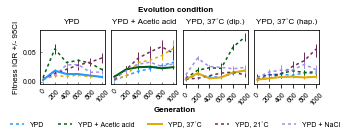

In [10]:
## import seaborn as sns
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
#Plotting
fig, ((ax17,ax18,ax19,ax20)) = plt.subplots(1, 4, figsize=(5,1), sharey=True)
my_suptitle = plt.suptitle("Evolution condition",y=1.2,fontsize=8, fontweight="bold")
plt.setp((ax17,ax18,ax19,ax20), xticks=epoch_array, xticklabels=['0', '200', '400','600', '800', '1000'])

ax17.set_xlabel("", fontsize=0)
ax17.plot(epoch_array,YPDmean_s30, linewidth=2, color=colors[0],label="YPD")
ax17.errorbar(epoch_array,YPDmean_s30, linewidth=1, yerr=YPD_s30_error, color=colors[0], label=None)
ax17.plot(epoch_array,YPDmean_sAA, linewidth=1.5, color=colors[1],label="YPD + Acetic acid", linestyle='--', dashes=(2, 2))
ax17.errorbar(epoch_array,YPDmean_sAA, linewidth=1, yerr=YPD_sAA_error, color=colors[1], label=None, linestyle='')
ax17.plot(epoch_array,YPDmean_s37, linewidth=1.5, color=colors[2],label="YPD, 37˚C", linestyle='--', dashes=(2, 2))
ax17.errorbar(epoch_array,YPDmean_s37, linewidth=1, yerr=YPD_s37_error, color=colors[2], label=None, linestyle='')
ax17.plot(epoch_array,YPDmean_sRT, linewidth=1.5, color=colors[3],label="YPD, 21˚C", linestyle='--', dashes=(2, 2))
ax17.errorbar(epoch_array,YPDmean_sRT, linewidth=1, yerr=YPD_sRT_error, color=colors[3], label=None, linestyle='')
ax17.plot(epoch_array,YPDmean_sNaCl, linewidth=1.5, color=colors[4],label="YPD + NaCl", linestyle='--', dashes=(2, 2))
ax17.errorbar(epoch_array,YPDmean_sNaCl, linewidth=1, yerr=YPD_sNaCl_error, color=colors[4], label=None, linestyle='')
##
plt.setp(ax17.get_xticklabels(), fontsize=7, rotation=45)
ax17.set_ylabel("Fitness IQR +/- 95CI", fontsize=8)
#ax17.axes.xaxis.set_visible(False)
ax17.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax17.get_yticklabels(), fontsize=7)

ax18.plot(epoch_array,AAmean_s30, linewidth=1.5, color=colors[0],label="YPD", linestyle='--', dashes=(2, 2))
ax18.errorbar(epoch_array,AAmean_s30, linewidth=1, yerr=AA_s30_error, color=colors[0], label=None, linestyle='')
ax18.plot(epoch_array,AAmean_sAA, linewidth=2, color=colors[1],label="YPD + Acetic acid")
ax18.errorbar(epoch_array,AAmean_sAA, linewidth=1, yerr=AA_sAA_error, color=colors[1], label=None)
ax18.plot(epoch_array,AAmean_s37, linewidth=1.5, color=colors[2],label="YPD, 37˚C", linestyle='--', dashes=(2, 2))
ax18.errorbar(epoch_array,AAmean_s37, linewidth=1, yerr=AA_s37_error, color=colors[2], label=None, linestyle='')
ax18.plot(epoch_array,AAmean_sRT, linewidth=1.5, color=colors[3],label="YPD, 21˚C", linestyle='--', dashes=(2, 2))
ax18.errorbar(epoch_array,AAmean_sRT, linewidth=1, yerr=AA_sRT_error, color=colors[3], label=None, linestyle='')
ax18.plot(epoch_array,AAmean_sNaCl, linewidth=1.5, color=colors[4],label="YPD + NaCl", linestyle='--', dashes=(2, 2))
ax18.errorbar(epoch_array,AAmean_sNaCl, linewidth=1, yerr=AA_sNaCl_error, color=colors[4], label=None, linestyle='')

ax18.set_ylabel("", fontsize=0)
ax18.axes.yaxis.set_visible(False)
#ax18.axes.xaxis.set_visible(False)
ax18.tick_params(direction='in', length=2, width=0.5)
ax18.set_xlabel("", fontsize=0)
plt.setp(ax18.get_xticklabels(), fontsize=7, rotation=45)


ax19.plot(epoch_array,YPD37mean_s30, linewidth=1.5, color=colors[0],label="YPD", linestyle='--', dashes=(2, 2))
ax19.errorbar(epoch_array,YPD37mean_s30, linewidth=1, yerr=YPD37_s30_error, color=colors[0], label=None, linestyle='')
ax19.plot(epoch_array,YPD37mean_sAA, linewidth=1.5, color=colors[1],label="YPD + Acetic acid", linestyle='--', dashes=(2, 2))
ax19.errorbar(epoch_array,YPD37mean_sAA, linewidth=1, yerr=YPD37_sAA_error, color=colors[1], label=None, linestyle='')
ax19.plot(epoch_array,YPD37mean_s37, linewidth=2, color=colors[2],label="YPD, 37˚C")
ax19.errorbar(epoch_array,YPD37mean_s37, linewidth=1, yerr=YPD37_s37_error, color=colors[2], label=None)
ax19.plot(epoch_array,YPD37mean_sRT, linewidth=1.5, color=colors[3],label="YPD, 21˚C", linestyle='--', dashes=(2, 2))
ax19.errorbar(epoch_array,YPD37mean_sRT, linewidth=1, yerr=YPD37_sRT_error, color=colors[3], label=None, linestyle='')
ax19.plot(epoch_array,YPD37mean_sNaCl, linewidth=1.5, color=colors[4],label="YPD + NaCl", linestyle='--', dashes=(2, 2))
ax19.errorbar(epoch_array,YPD37mean_sNaCl, linewidth=1, yerr=YPD37_sNaCl_error, color=colors[4], label=None, linestyle='')
ax19.set_ylabel("", fontsize=0)
ax19.set_xlabel("", fontsize=0)
ax19.axes.yaxis.set_visible(False)
#ax19.axes.xaxis.set_visible(False)
# ax19.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax19.get_xticklabels(), fontsize=7, rotation=45)

ax20.plot(epoch_array,YPD37Hmean_s30, linewidth=1.5, color=colors[0],label="YPD", linestyle='--', dashes=(2, 2))
ax20.errorbar(epoch_array,YPD37Hmean_s30, linewidth=1, yerr=YPD37H_s30_error, color=colors[0], label=None, linestyle='')
ax20.plot(epoch_array,YPD37Hmean_sAA, linewidth=1.5, color=colors[1],label="YPD + Acetic acid", linestyle='--', dashes=(2, 2))
ax20.errorbar(epoch_array,YPD37Hmean_sAA, linewidth=1, yerr=YPD37H_sAA_error, color=colors[1], label=None, linestyle='')
ax20.plot(epoch_array,YPD37Hmean_s37, linewidth=2, color=colors[2],label="YPD, 37˚C")
ax20.errorbar(epoch_array,YPD37Hmean_s37, linewidth=1, yerr=YPD37H_s37_error, color=colors[2], label=None)
ax20.plot(epoch_array,YPD37Hmean_sRT, linewidth=1.5, color=colors[3],label="YPD, 21˚C", linestyle='--', dashes=(2, 2))
ax20.errorbar(epoch_array,YPD37Hmean_sRT, linewidth=1, yerr=YPD37H_sRT_error, color=colors[3], label=None, linestyle='')
ax20.plot(epoch_array,YPD37Hmean_sNaCl, linewidth=1.5, color=colors[4],label="YPD + NaCl", linestyle='--', dashes=(2, 2))
ax20.errorbar(epoch_array,YPD37Hmean_sNaCl, linewidth=1, yerr=YPD37H_sNaCl_error, color=colors[4], label=None, linestyle='')

ax20.set_ylabel("", fontsize=0)
ax20.set_xlabel("", fontsize=0)
ax20.axes.yaxis.set_visible(False)
# ax16.axes.xaxis.set_visible(False)
#ax20.axes.xaxis.set_visible(False)
# ax20.tick_params(direction='in', length=2, width=0.5)
plt.setp(ax20.get_xticklabels(), fontsize=7, rotation=45)
##
plt.subplots_adjust(wspace=0.1,hspace=0.1)
fig.text(0.5, -0.25, 'Generation', ha='center',fontsize=8, fontweight="bold")
#fig.text(0.01, 0.5, 'Fitness (s) IQR +/- 95CI', va='center', rotation='vertical', fontsize=8, fontweight="bold")

ax17.set_title("YPD", fontsize=8)
ax18.set_title("YPD + Acetic acid", fontsize=8)

ax19.set_title("YPD, 37˚C (dip.)", fontsize=8)
ax20.set_title("YPD, 37˚C (hap.)", fontsize=8)
#plt.legend(fontsize=7,loc='center', bbox_to_anchor=(0, 0.5),title="Assay environment",title_fontsize=7)
#plt.legend(fontsize=7,title="Assay environment", loc="center", bbox_to_anchor=(0.5, -2))

plt.legend(ncol=5, 
          loc='upper center',
          bbox_to_anchor=(0.5, -0.3),
          bbox_transform=plt.gcf().transFigure,fontsize=7,frameon=False)


##
plt.subplots_adjust(wspace=0.1,hspace=0.1)
#fig.text(0.5, 0.075, 'Generation', ha='center',fontsize=8, fontweight="bold")
#fig.text(0.01, 0.5, 'Fitness in assay environment', va='center', rotation='vertical', fontsize=8, fontweight="bold")
plt.savefig('20210622_iqr_unfil_adj.jpg', bbox_inches='tight', dpi=1200)